In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv("./data/creditcard_2023.csv")


In [4]:
# Display the first few rows of the dataset
print(data.head())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [5]:
# Check for missing values
print(data.isnull().sum())


id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
# Understand the distribution of the target variable
print(data['Class'].value_counts())

0    284315
1    284315
Name: Class, dtype: int64


In [7]:
# Summary statistics of numerical features
print(data.describe())

                  id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -1.109271e-14 -3.429498e-14 -1.209242e-14  3.825991e-15   
std    164149.486121  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   6.288281e-15 -2.751174e-14  1.240002e-14  8.208047e-15 -1.002980e-14   
std    1.000001e+00  1.000001e+00  1.00000

In [8]:
# Summary statistics of anonymized features
anonymized_features = data.drop(columns=['id', 'Amount', 'Class'])
anonymized_features_stats = anonymized_features.describe()

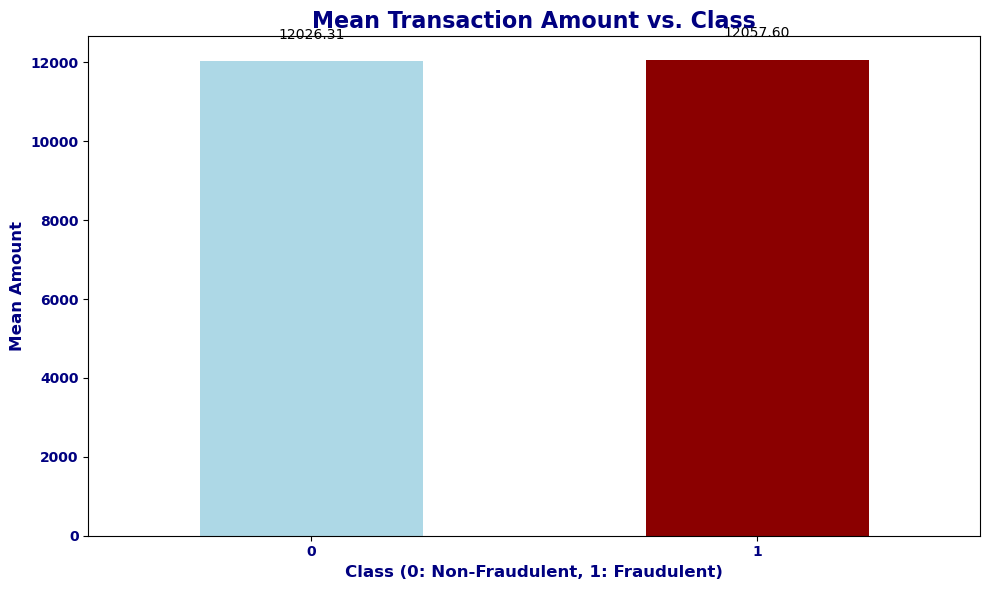

In [11]:
# Calculate the mean transaction amount for each class
mean_amounts = data.groupby('Class')['Amount'].mean()

# Plot the bar plot
plt.figure(figsize=(10, 6))
ax = mean_amounts.plot(kind='bar', color=['lightblue', 'darkred'])

# Add numeric values on top of each bar
for i, v in enumerate(mean_amounts):
    ax.text(i, v + 500, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Add title and labels with custom font properties
plt.title('Mean Transaction Amount vs. Class', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)', fontsize=12, fontweight='bold', color='navy')
plt.ylabel('Mean Amount', fontsize=12, fontweight='bold', color='navy')

# Customize tick labels font properties
plt.xticks(rotation=0, fontsize=10, fontweight='bold', color='navy')
plt.yticks(fontsize=10, fontweight='bold', color='navy')

# Show plot
plt.tight_layout()
plt.show()


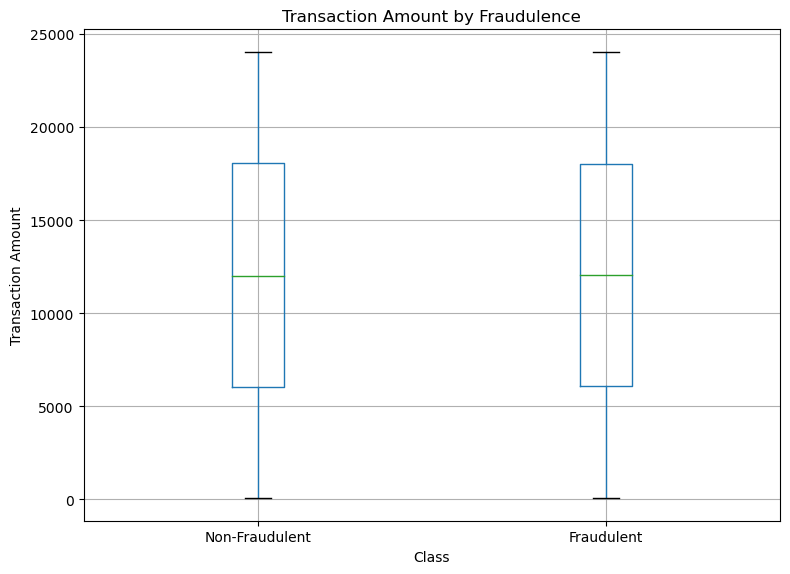

In [18]:
# Create the boxplots
fig, ax = plt.subplots(figsize=(8, 6))
data.boxplot(column='Amount', by='Class', ax=ax)

# Adding titles and labels
plt.title('Transaction Amount by Fraudulence')
plt.suptitle('')  # Suppress the automatic title
plt.ylabel('Transaction Amount')

# Change x-axis labels from '0', '1' to 'Non-Fraudulent', 'Fraudulent'
ax.set_xticklabels(['Non-Fraudulent', 'Fraudulent'])

# Show plot
plt.tight_layout()
plt.show()


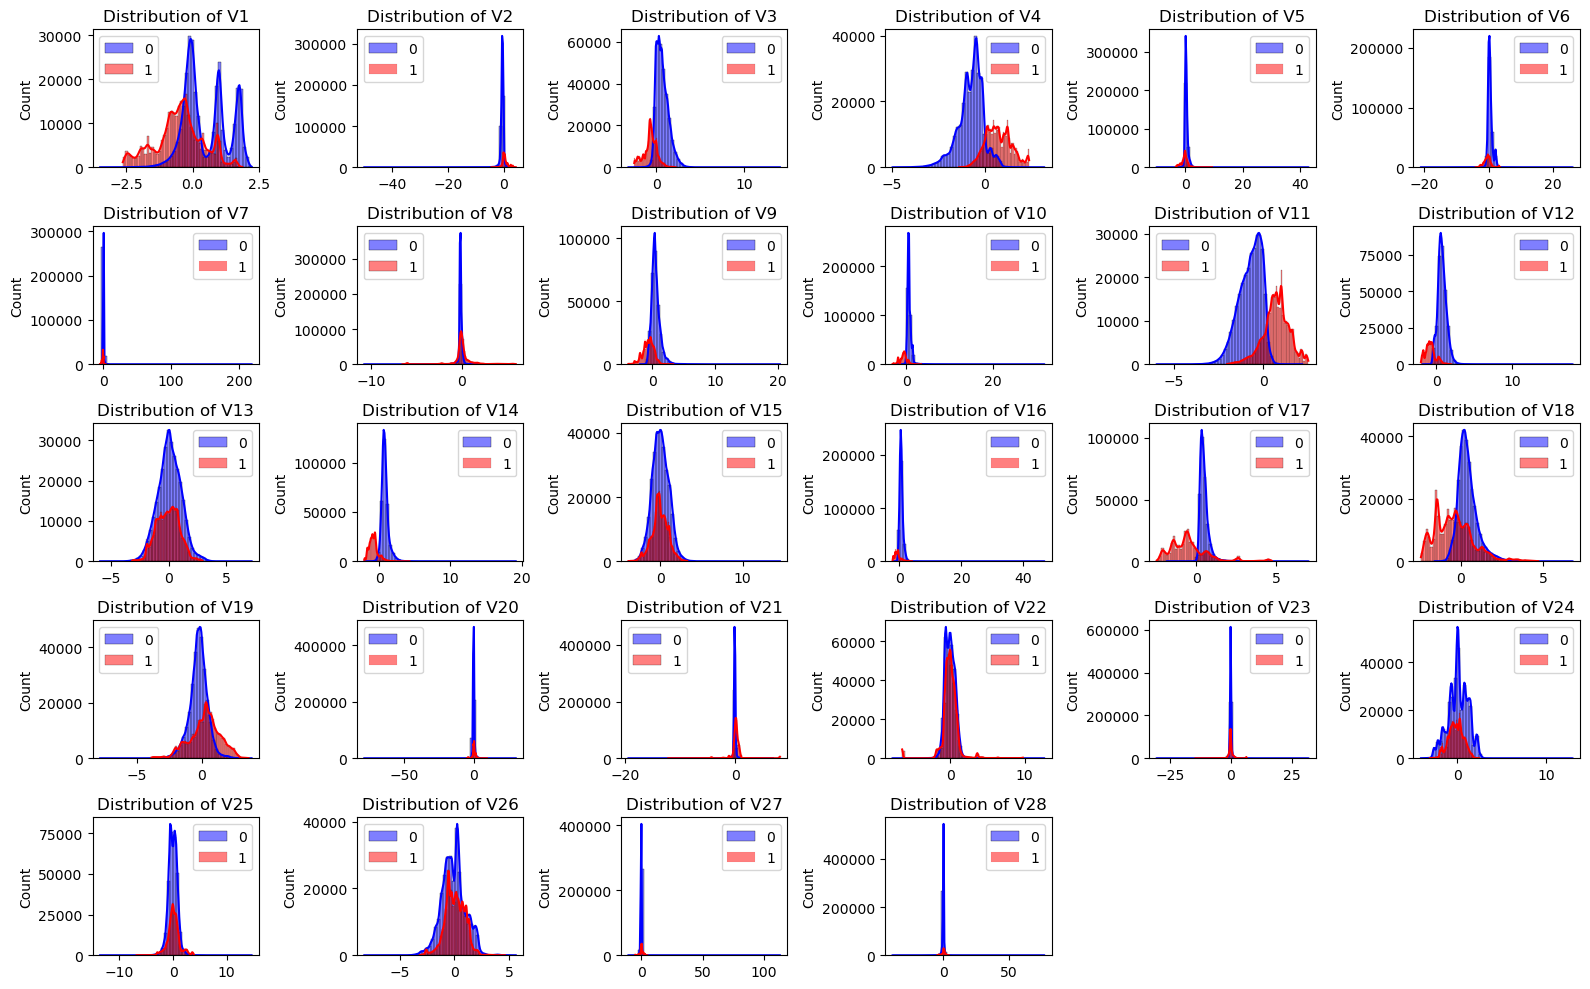

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
for i, col in enumerate(anonymized_features.columns):
    plt.subplot(5, 6, i + 1)
    sns.histplot(data=data[data['Class'] == 0][col], bins=50, kde=True, color='blue', label='0')
    sns.histplot(data=data[data['Class'] == 1][col], bins=50, kde=True, color='red', label='1')
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.legend()
plt.tight_layout()
plt.show()
